In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
os.cdhir('C:\Users\Hp\Desktop')
df=pd.read_excel("HWdata.xlsx")

In [3]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().values.any()

In [ ]:
df.corr()

In [4]:
df = df.drop(columns=['20_target','90_target'])

In [ ]:
df.corr()['50_target'].sort_values(ascending = False)

In [ ]:
df.corr()['50_target'].mean()

In [ ]:
df.corr()['50_target'].abs() < 0.01

In [5]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#fnd index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [6]:
dfx = df.drop(df[to_drop], axis=1)

In [ ]:
dfx.corr()['50_target'].sort_values(ascending = False)

In [7]:
dfx = dfx.drop(columns=['ind_164','ind_403','ind_176', 'ind_40' , 'ind_9', 'ind_28', 'ind_88', 'ind_422','ind_8','ind_172' ])

In [8]:
dfx['ind_420'] = dfx['ind_420'].replace('?',np.nan)

In [9]:
dfx['ind_420'].isnull().values.any()

True

In [10]:
dfx['ind_109'].describe()

count      6167
unique        2
top       GREEN
freq       3132
Name: ind_109, dtype: object

In [ ]:
dfx['ind_109'].describe()

In [ ]:
dfx['ind_420'].describe()

In [11]:
dfx['ind_420'] = dfx['ind_420'].replace(np.nan, 30)

In [12]:
dfx['ind_420'] = dfx['ind_420'].astype(float)

In [13]:
dfx['ind_422'] = dfx['ind_422'].replace('?',np.nan)
dfx['ind_422'].isnull().values.any()

KeyError: 'ind_422'

In [14]:
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [15]:
dfx['ind_422'] = dfx['ind_422'].replace(np.nan, -153)

KeyError: 'ind_422'

In [16]:
dfx = pd.get_dummies(dfx)

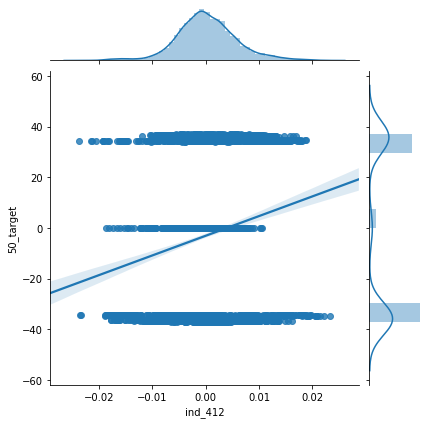

In [17]:
sns.jointplot(x = "ind_412",y = "50_target",data = dfx , kind="reg")

In [19]:
import scipy.stats as stats
import pylab

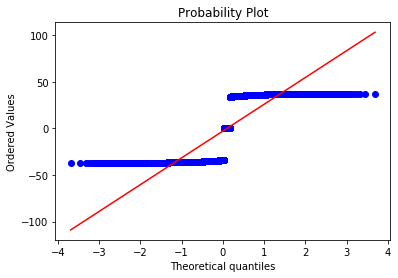

In [20]:
stats.probplot(dfx["50_target"],dist = "norm",plot = pylab)
pylab.show()

In [21]:
dfx['50_target'].isnull().sum()

0

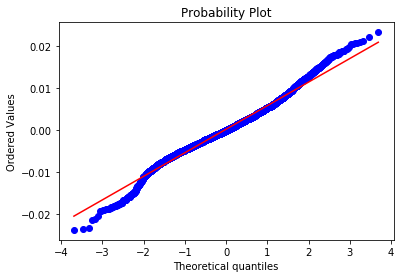

In [22]:
stats.probplot(dfx["ind_412"],dist = "norm",plot = pylab)
pylab.show()

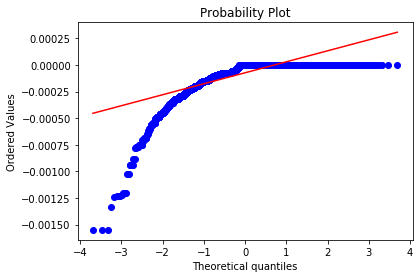

In [23]:
stats.probplot(dfx["ind_324"],dist = "norm",plot = pylab)
pylab.show()

In [24]:
import statsmodels.api as sm
X = dfx[["ind_412"]]
X[0:5]
X=sm.add_constant(X) # sabit bir değer atıyor , b0 olarak
X[0:5]

y = dfx["50_target"]
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [25]:
lm= sm.OLS(y,X) # noralite varsayımına gerek duymmadığı için kullnmması daha rahat.
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           1.12e-23
Time:                        15:20:37   Log-Likelihood:                -30548.
No. Observations:                6167   AIC:                         6.110e+04
Df Residuals:                    6165   BIC:                         6.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0803      0.437     -7.051      0.000      -3.937      -2.224
ind_412      776.9121     77.136     10.072      0.000     625.699     928.125
==============================================================================
Omnibus:                    23611.332   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.472
Skew:                           0.149   Prob(JB):                    4.81e-196
Kurtosis:                       1.153   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params

const       -3.080261
ind_412    776.912135
dtype: float64

In [27]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-3.0803,0.437,-7.051,0.000,-3.937,-2.224
ind_412,776.9121,77.136,10.072,0.000,625.699,928.125


In [28]:
print("f_value: ", "%.4f" %model.f_pvalue)
print("fvalue: ", "%.2f" %model.fvalue)
print("tvalue: ", "%.2f" %model.tvalues[0:1])

f_value:  0.0000
fvalue:  101.44
tvalue:  -7.05


In [29]:
model.rsquared_adj

0.016029009122015325

In [30]:
model.fittedvalues[0:5]

0   -1.237857
1   -0.691721
2   -0.313407
3    0.311841
4    0.181207
dtype: float64

In [31]:
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.formula.api as smf

In [39]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["50_target" , "ind_5" , "ind_42" , "ind_237", "ind_241","ind_315","ind_316","ind_311","ind_344","ind_340"])
y = dfx["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)



In [40]:
lm = sm.OLS(y_train , X_train)

In [41]:
model = lm.fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.36
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           3.19e-59
Time:                        15:21:44   Log-Likelihood:                -24309.
No. Observations:                4933   AIC:                         4.866e+04
Df Residuals:                    4912   BIC:                         4.880e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ind_14            0.2134      0.074      2.890      0.004       0.069       0.358
ind_18            1.2702      0.226      5.610      0.000       0.826       1.714
ind_27        -2302.4218    811.345     -2.838      0.005   -3893.020    -711.824
ind_29            0.0057      0.007      0.780      0.435      -0.009       0.020
ind_179           0.0983      0.084      1.167      0.243      -0.067       0.263
ind_217           1.7323      0.552      3.140      0.002       0.651       2.814
ind_225        -128.8889     48.965     -2.632      0.009    -224.882     -32.895
ind_228          -2.1583      2.962     -0.729      0.466      -7.966       3.649
ind_239        1.608e+04   3750.282      4.288      0.000    8730.044    2.34e+04
ind_309        2.896e+04   7773.006      3.725      0.000    1.37e+04    4.42e+04
ind_310           3.6000      1.203      2.993      0.003       1.242       5.958
ind_324       -1.601e+04   4778.625     -3.349      0.001   -2.54e+04   -6637.564
ind_327          -0.0266      0.017     -1.572      0.116      -0.060       0.007
ind_330          -4.3269      1.223     -3.538      0.000      -6.724      -1.929
ind_334        2307.2013   7420.658      0.311      0.756   -1.22e+04    1.69e+04
ind_349       -1.406e+04   2.34e+04     -0.601      0.548   -5.99e+04    3.18e+04
ind_412         889.7431     95.049      9.361      0.000     703.404    1076.082
ind_416           0.2105      0.032      6.487      0.000       0.147       0.274
ind_420          -0.0173      0.005     -3.539      0.000      -0.027      -0.008
ind_109_GREEN   -17.0851      4.816     -3.547      0.000     -26.527      -7.643
ind_109_RED     -16.0041      4.803     -3.332      0.001     -25.419      -6.589
==============================================================================
Omnibus:                    22747.215   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.828
Skew:                           0.137   Prob(JB):                    2.76e-127
Kurtosis:                       1.339   Cond. No.                     5.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["ind_309","ind_327","ind_179","ind_237","ind_349","ind_422","ind_42","50_target","ind_5","log_ind14","ind_403","ind_344","ind_316","ind_241","ind_228","ind_88","ind_8","ind_28"])
y = dfx["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)
lm = sm.OLS(y_train , X_train)
model = lm.fit()


KeyError: "['ind_422' 'log_ind14' 'ind_403' 'ind_88' 'ind_8' 'ind_28'] not found in axis"

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     17.36
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           3.19e-59
Time:                        15:21:47   Log-Likelihood:                -24309.
No. Observations:                4933   AIC:                         4.866e+04
Df Residuals:                    4912   BIC:                         4.880e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ind_14            0.2134      0.074      2.890      0.004       0.069       0.358
ind_18            1.2702      0.226      5.610      0.000       0.826       1.714
ind_27        -2302.4218    811.345     -2.838      0.005   -3893.020    -711.824
ind_29            0.0057      0.007      0.780      0.435      -0.009       0.020
ind_179           0.0983      0.084      1.167      0.243      -0.067       0.263
ind_217           1.7323      0.552      3.140      0.002       0.651       2.814
ind_225        -128.8889     48.965     -2.632      0.009    -224.882     -32.895
ind_228          -2.1583      2.962     -0.729      0.466      -7.966       3.649
ind_239        1.608e+04   3750.282      4.288      0.000    8730.044    2.34e+04
ind_309        2.896e+04   7773.006      3.725      0.000    1.37e+04    4.42e+04
ind_310           3.6000      1.203      2.993      0.003       1.242       5.958
ind_324       -1.601e+04   4778.625     -3.349      0.001   -2.54e+04   -6637.564
ind_327          -0.0266      0.017     -1.572      0.116      -0.060       0.007
ind_330          -4.3269      1.223     -3.538      0.000      -6.724      -1.929
ind_334        2307.2013   7420.658      0.311      0.756   -1.22e+04    1.69e+04
ind_349       -1.406e+04   2.34e+04     -0.601      0.548   -5.99e+04    3.18e+04
ind_412         889.7431     95.049      9.361      0.000     703.404    1076.082
ind_416           0.2105      0.032      6.487      0.000       0.147       0.274
ind_420          -0.0173      0.005     -3.539      0.000      -0.027      -0.008
ind_109_GREEN   -17.0851      4.816     -3.547      0.000     -26.527      -7.643
ind_109_RED     -16.0041      4.803     -3.332      0.001     -25.419      -6.589
==============================================================================
Omnibus:                    22747.215   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.828
Skew:                           0.137   Prob(JB):                    2.76e-127
Kurtosis:                       1.339   Cond. No.                     5.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([338., 555., 645., 521., 366., 418., 512., 685., 551., 342.]),
 array([-1.79044201, -1.43389372, -1.07734544, -0.72079715, -0.36424886,
        -0.00770058,  0.34884771,  0.705396  ,  1.06194428,  1.41849257,
         1.77504086]),
 <a list of 10 Patch objects>)

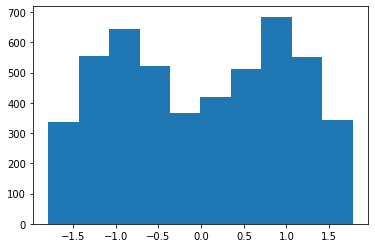

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
type(X_train), type(X_tr)

plt.hist(X_tr[:,3])

(array([338., 555., 645., 521., 366., 418., 512., 685., 551., 342.]),
 array([-1.79044201, -1.43389372, -1.07734544, -0.72079715, -0.36424886,
        -0.00770058,  0.34884771,  0.705396  ,  1.06194428,  1.41849257,
         1.77504086]),
 <a list of 10 Patch objects>)

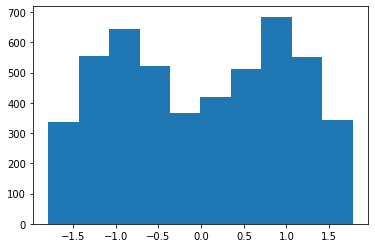

In [46]:
plt.hist(X_tr[:,3])

In [47]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["ind_309","ind_327","ind_179","ind_237","ind_349","ind_422","ind_42","50_target","ind_5","log_ind14","ind_403","ind_344","ind_316","ind_241","ind_228","ind_88","ind_8","ind_28"])
y = dfx["50_target"]

X_tr, X_te , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)
lm = sm.OLS(y_train , X_train)
model = lm.fit()

KeyError: "['ind_422' 'log_ind14' 'ind_403' 'ind_88' 'ind_8' 'ind_28'] not found in axis"

In [48]:
influence = model.get_influence()
influence

Leverage vs studentized residuals


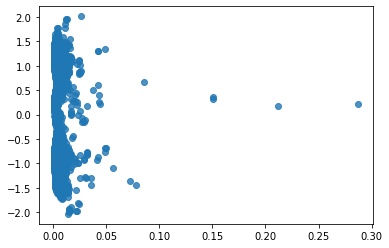

In [49]:
resid_student = influence.resid_studentized_external

(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)

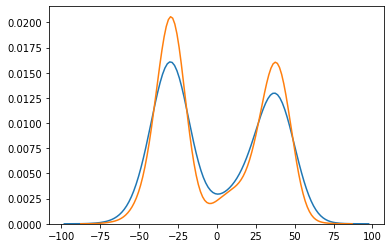

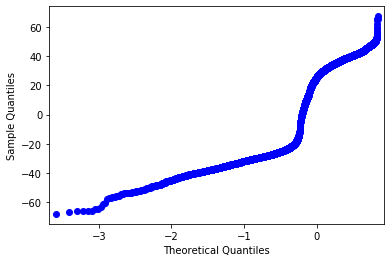

In [50]:
advres = pd.concat([dfx , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist=False)

sm.qqplot(advres.resid)
plt.show()

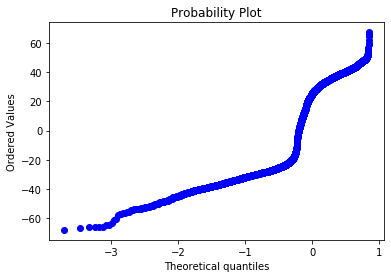

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


In [51]:
import pylab
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()
from scipy.stats import shapiro

stat, p =shapiro(advres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

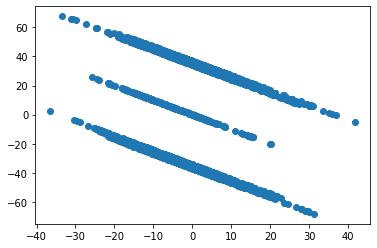

In [52]:
resid = model.resid
plt.scatter(model.predict() , resid)

In [53]:
mse = mean_squared_error(y, model.fittedvalues)

ValueError: Found input variables with inconsistent numbers of samples: [6167, 4933]

In [54]:
X = dfx.drop(columns = ["50_target"])
y = dfx["50_target"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42 )
X_train.shape

(4625, 30)

## PCA

In [56]:
pca = PCA()

NameError: name 'PCA' is not defined

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train)) #scale sebebi normalizasyon yapmamız daha iyi olur pca yaparken
X_reduced_train[0:1, :] #yeni bir x dataseti veriyor reduced edilmiş

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)
#[0:5]

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [ ]:
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=10)
X_reduced_train = pca.fit_transform(scale(X_train))
lm= LinearRegression()
pcr_model = lm.fit(X_reduced_train , y_train)

In [ ]:
pcr_model.intercept_

In [ ]:
pcr_model.coef_

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
df['50_target'].mean()

In [ ]:
r2_score(y_train, y_pred)

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0] , PCA_components[1], alpha = .10 , color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# **RandomForest Regression**

In [60]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

### **Tahmin**

In [61]:
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

14.565449776609139

## **Tunning**

In [62]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}
rfr_model = RandomForestRegressor(random_state=42)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   23.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_fe

In [63]:
rfr_cv_model.best_params_

{'max_depth': 4, 'max_features': 7, 'n_estimators': 50}

In [64]:
rfr_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=7,
                                  n_estimators=50)
rfr_tuned.fit(X_train, y_train)
y_pred = rfr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

30.891049124922528

Feature selection yonteminde buradan onemli olan 5-10 features'i secip onu modelde kullanabiliriz. 

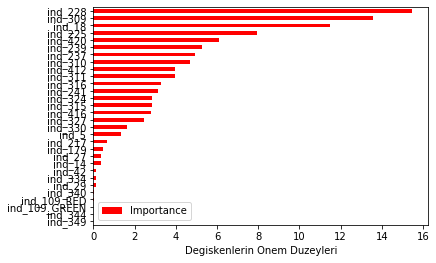

In [65]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},
                          index=X_train.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

# Neural Networks Rergession

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [67]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
mlp_model.n_layers_

4

In [69]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin 

In [70]:
y_pred = mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

23.744792164653656

## Model Tuning

In [71]:
'''
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}
'''

mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 31.6min


KeyboardInterrupt: 

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [ ]:
mlp_tuned = MLPRegressor(alpha= 0.01, hidden_layer_sizes=(100,50,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_pred = mlp_tuned.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

351.0122628656612

## DOGRUSAL OLMAYAN SVC REGRESSON 

In [ ]:
svr_model = SVR('linear').fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5]

In [ ]:
print( 'y = {0} + {1}  x'.format(svr_mpdel.intercept_[0] ,
                                 svr_model.coef_[0][0]))

In [ ]:
X_train['Hits'][0:1]

In [ ]:
y_pred = svr_model.predict(X_train)

In [ ]:
plt.scatter(X_train , y_train)
plt.plot(X_train, y_pred, color = 'r')

In [ ]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print('y = {0} + {1}  x'.format(lm_model.intercept_ , lm_model.coef_[0]))

In [ ]:
plt.scatter(X_train, y_train, alpha=0.5 , s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')


In [ ]:
##  Tahmin

In [ ]:
print( 'y = {0} + {1}  x'.format(svr_mpdel.intercept_[0] ,
                                 svr_model.coef_[0][0]))

In [ ]:
svr_model.predict([[91]])

In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
svr_model

In [ ]:
##MODEL TUNING

In [ ]:
svr_params = {'C' : np.arange(0.1 , 2 , 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

In [ ]:
svr_tuned = SVR('linear', 
               C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
nq.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
svr_rbf = SVR('rbf').fit(X_train, y_train)

In [ ]:
# tahmin
y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test , y_pred))

In [ ]:
svr_rbf

#### CAT BOOST REGRESSOR

In [ ]:
catb = CatBoostRegressor()
catb.fit(X_train,y_train)

In [ ]:
y_pred = catb.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
catb_grid = {"iterations": [200,500,1000,2000],
            "learning_rate": [0.01,0.03,0.04],
            "depth": [3,4,5,6]}

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv= 10, n_jobs=-1, verbose=2)

catb_cv_model.fit(X_train, y_train)

### KNN Regressor

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV